# Part I - (ProsperLoan Data)
## by (Tabitha Wanjiru Muhiukia)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Tabitha\Desktop\UDACITY\Communicate Findings\prosperLoanData.csv")

In [3]:
data.shape

(113937, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

>my dataset has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

My goal is finding out loan repayment trends and factors that affect late loan repaymemt.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For my analysis i have selected the following features that will assist in exploration:
EstimatedLoss, Investors, Term, LoanStatus, ProsperRating (Alpha), LoanKey, LoanOriginalAmount, LoanOriginationDate, EmploymentStatus, ListingCategory (numeric), TotalProsperLoans, ProsperScore.

In [5]:
selected_data=['EstimatedLoss', 'Investors', 'Term', 'LoanStatus', 'ProsperRating (Alpha)', 
               'LoanKey', 'LoanOriginalAmount', 'LoanOriginationDate', 'EmploymentStatus', 
               'ListingCategory (numeric)', 'TotalProsperLoans', 'ProsperScore']

In [6]:
df=data[selected_data]

In [7]:
df.head()

,EstimatedLoss,Investors,Term,LoanStatus,ProsperRating (Alpha),LoanKey,LoanOriginalAmount,LoanOriginationDate,EmploymentStatus,ListingCategory (numeric),TotalProsperLoans,ProsperScore
0,NaN,258,36,Completed,NaN,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Self-employed,0,NaN,NaN
1,0.0249,1,36,Current,A,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Employed,2,NaN,7.0
2,NaN,41,36,Completed,NaN,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Not available,0,NaN,NaN
3,0.0249,158,36,Current,A,A0393664465886295619C51,10000,2012-11-01 00:00:00,Employed,16,NaN,9.0
4,0.0925,20,36,Current,D,A180369302188889200689E,15000,2013-09-20 00:00:00,Employed,2,1.0,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   EstimatedLoss              84853 non-null   float64
 1   Investors                  113937 non-null  int64  
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   LoanKey                    113937 non-null  object 
 6   LoanOriginalAmount         113937 non-null  int64  
 7   LoanOriginationDate        113937 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  TotalProsperLoans          22085 non-null   float64
 11  ProsperScore               84853 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.4+ MB


In [9]:
df.describe()

,EstimatedLoss,Investors,Term,LoanOriginalAmount,ListingCategory (numeric),TotalProsperLoans,ProsperScore
count,84853.000000,113937.000000,113937.000000,113937.00000,113937.000000,22085.000000,84853.000000
mean,0.080306,80.475228,40.830248,8337.01385,2.774209,1.421100,5.950067
std,0.046764,103.239020,10.436212,6245.80058,3.996797,0.764042,2.376501
min,0.004900,1.000000,12.000000,1000.00000,0.000000,0.000000,1.000000
25%,0.042400,2.000000,36.000000,4000.00000,1.000000,1.000000,4.000000
50%,0.072400,44.000000,36.000000,6500.00000,1.000000,1.000000,6.000000
75%,0.112000,115.000000,36.000000,12000.00000,3.000000,2.000000,8.000000
max,0.366000,1189.000000,60.000000,35000.00000,20.000000,8.000000,11.000000


### Data Wrangling:

In [10]:
df=df.dropna(subset=['ProsperRating (Alpha)'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EstimatedLoss              84853 non-null  float64
 1   Investors                  84853 non-null  int64  
 2   Term                       84853 non-null  int64  
 3   LoanStatus                 84853 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   LoanKey                    84853 non-null  object 
 6   LoanOriginalAmount         84853 non-null  int64  
 7   LoanOriginationDate        84853 non-null  object 
 8   EmploymentStatus           84853 non-null  object 
 9   ListingCategory (numeric)  84853 non-null  int64  
 10  TotalProsperLoans          19797 non-null  float64
 11  ProsperScore               84853 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 8.4+ MB


In [12]:
df['TotalProsperLoans']=df['TotalProsperLoans'].fillna(0)

In [13]:
df.rename(index=str,columns={'EstimatedLoss':'Estimated_Loss', 
                            'LoanStatus':'Loan_Status',
                            'ProsperRating (Alpha)':'Credit_Grade',
                            'LoanKey':'Loan_Key',
                            'LoanOriginalAmount':'Disbursed_Amount',
                            'LoanOriginationDate':'Disbursed_Date',
                            'EmploymentStatus':'Employment_Status',
                            'ListingCategory (numeric)':'Listing_Category',
                            'TotalProsperLoans':'Total_Loans',
                            'ProsperScore':'Prosper_Score'}, inplace=True)

In [14]:
df['Disbursed_Date']=pd.to_datetime(df['Disbursed_Date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Estimated_Loss     84853 non-null  float64       
 1   Investors          84853 non-null  int64         
 2   Term               84853 non-null  int64         
 3   Loan_Status        84853 non-null  object        
 4   Credit_Grade       84853 non-null  object        
 5   Loan_Key           84853 non-null  object        
 6   Disbursed_Amount   84853 non-null  int64         
 7   Disbursed_Date     84853 non-null  datetime64[ns]
 8   Employment_Status  84853 non-null  object        
 9   Listing_Category   84853 non-null  int64         
 10  Total_Loans        84853 non-null  float64       
 11  Prosper_Score      84853 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 8.4+ MB


## Univariate Exploration

### To find out the distribution of Disbursements among customers

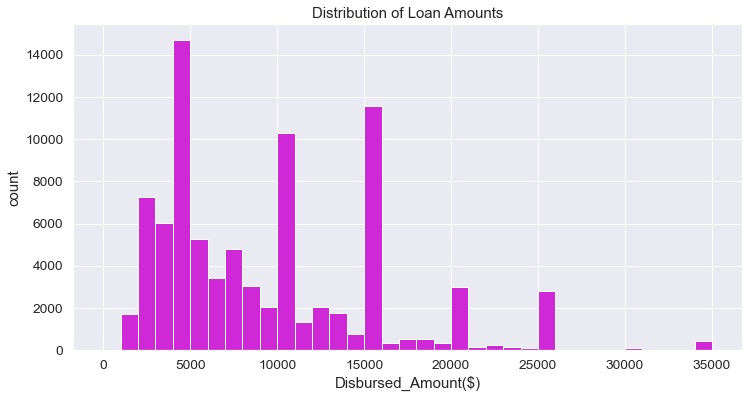

In [16]:
binsize=1000
bins=np.arange(0,df['Disbursed_Amount'].max()+binsize,binsize)
sb.set(style='darkgrid',font_scale=1.25)
plt.figure(figsize=(12,6))
plt.hist(data=df,x='Disbursed_Amount',bins=bins,color='#CF28D6')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Disbursed_Amount($)')
plt.ylabel('count')
plt.show()

### Distribution of Employment_Status of Customers

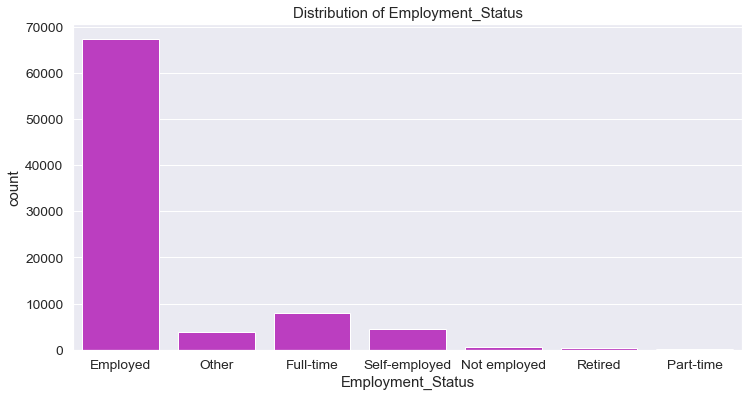

In [17]:
sb.set(style='darkgrid',font_scale=1.25)
plt.figure(figsize=(12,6))
sb.countplot(data=df,x='Employment_Status',color='#CF28D6')
plt.title('Distribution of Employment_Status')
plt.xlabel('Employment_Status')
plt.ylabel('count')
plt.show()

### Distribution of the Loan_Status

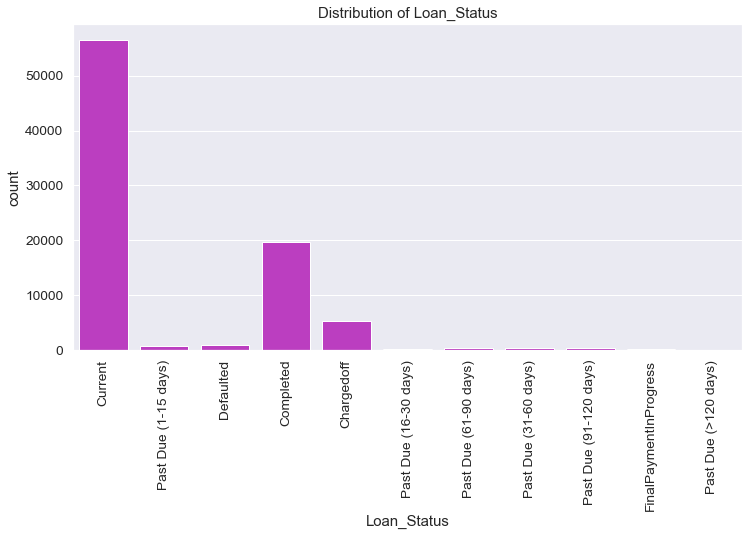

In [18]:
sb.set(style='darkgrid',font_scale=1.25)
plt.figure(figsize=(12,6))
sb.countplot(data=df,x='Loan_Status',color='#CF28D6')
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan_Status')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

### Checking Distribution of Loans by Term

In [19]:
df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [20]:
df['Loan_Term']=np.where((df['Term']==12),'12_months',
                np.where((df['Term']==36),'36_months',
                np.where((df['Term']==60),'60_months','months')))

In [21]:
loan_group=df.groupby(['Loan_Term','Term'])['Loan_Key'].agg('count')

In [22]:
loan_groupped=loan_group.reset_index()

In [23]:
loan_groupped

,Loan_Term,Term,Loan_Key
0,12_months,12,1613
1,36_months,36,58695
2,60_months,60,24545


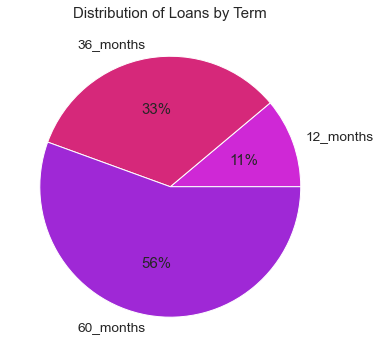

In [24]:
color=['#CF28D6','#D6287A','#9F28D6']
plt.figure(figsize=(12,6))
plt.pie(data=loan_groupped,x='Term',colors=color,labels='Loan_Term',autopct='%.0f%%')
plt.title('Distribution of Loans by Term')
plt.show()

Most Customers chose the 60 month tenure loan as depicted above in he piechart

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the variables choosen there were clear indications of extreme loan amount depicted by long tails from investigation of distribution of Loan Amounts. In addition i perfomed transformation to categorize defaulted and completed Loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Focusing on the Term of the loan i perfomed tidiness to ensure loan term is easily established.

## Bivariate Exploration

In [25]:
loan_group=(df['Loan_Status']=='Completed')|(df['Loan_Status']=='Defaulted')|(df['Loan_Status']=='Chargedoff')

In [26]:
Loans=df[loan_group]

In [27]:
Loans.head()

,Estimated_Loss,Investors,Term,Loan_Status,Credit_Grade,Loan_Key,Disbursed_Amount,Disbursed_Date,Employment_Status,Listing_Category,Total_Loans,Prosper_Score,Loan_Term
15,0.1650,10,36,Defaulted,HR,3EE2364952142596779635D,4000,2012-04-19,Other,13,0.0,5.0,36_months
23,0.1075,30,36,Defaulted,D,D0623679715048926AB9F4D,2000,2013-04-26,Employed,15,0.0,5.0,36_months
26,0.1225,37,60,Completed,E,3B763675825568665C5122A,4000,2013-02-21,Employed,1,0.0,3.0,60_months
27,0.0210,121,36,Completed,A,7E583591759296638A02214,4000,2010-06-24,Full-time,1,0.0,9.0,36_months
30,0.0380,30,36,Completed,A,FBCE36430983505912FD996,10000,2012-02-07,Employed,20,0.0,9.0,36_months


In [28]:
def loan_trans(row):
    if row['Loan_Status']=='Chargedoff':
        return 'Defaulted'
    else:
        return row['Loan_Status']
Loans['Loan_Status']=Loans.apply(loan_trans,axis=1)

C:\Users\Tabitha\AppData\Local\Temp/ipykernel_13680/3144617906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loans['Loan_Status']=Loans.apply(loan_trans,axis=1)


### How completed Loans compare with Credit Grade

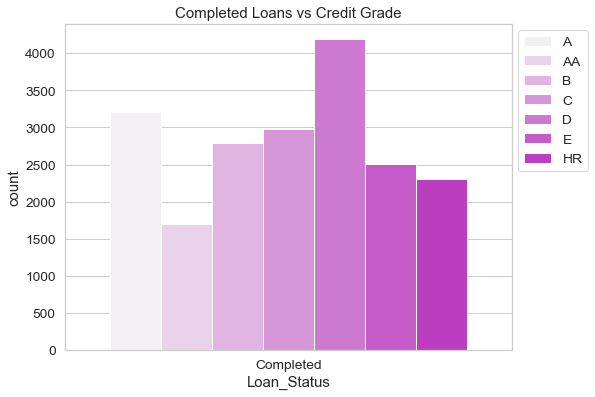

In [29]:
plt.figure(figsize=(8,6))
sb.set(style='whitegrid',font_scale=1.25)
sb.countplot(data=Loans[Loans['Loan_Status']=='Completed'],x='Loan_Status',hue='Credit_Grade',
             hue_order=['A','AA','B','C','D','E','HR'],color='#CF28D6')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Completed Loans vs Credit Grade')
plt.show()

### How Defaulted Loans compare with Credit Grade

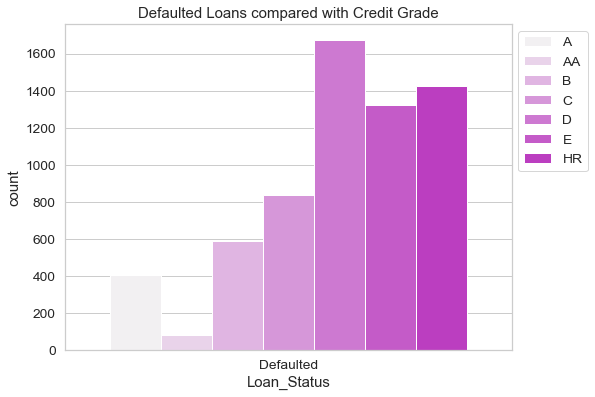

In [30]:
plt.figure(figsize=(8,6))
sb.set(style='whitegrid',font_scale=1.25)
sb.countplot(data=Loans[Loans['Loan_Status']=='Defaulted'],x='Loan_Status',hue='Credit_Grade',
             hue_order=['A','AA','B','C','D','E','HR'],color='#CF28D6')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title('Defaulted Loans compared with Credit Grade')
plt.show()

### Comparison between Employment Status and Loan Status

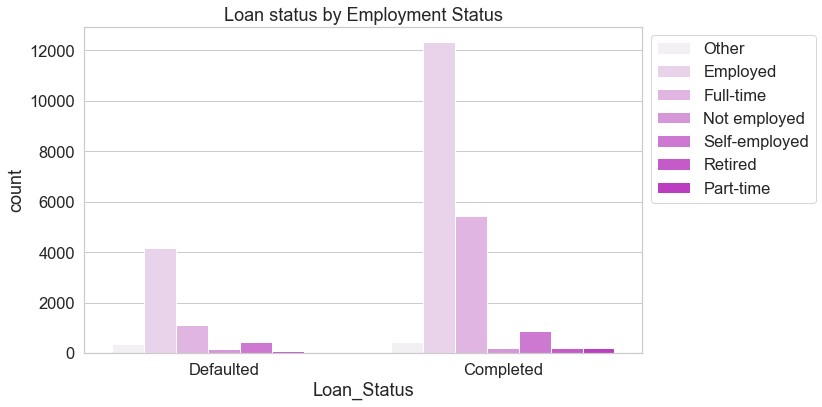

In [31]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.countplot(data =Loans, x = 'Loan_Status', hue = 'Employment_Status', color = '#CF28D6')
plt.title("Loan status by Employment Status")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('Loan_status_EmploymentStatus.png', dpi=300, bbox_inches='tight');
plt.show();

### Comparison between Employment Status and Term

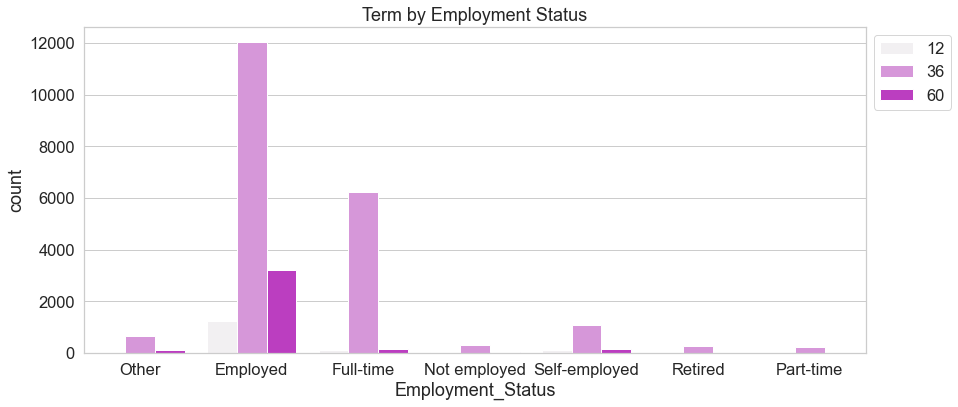

In [32]:
plt.figure(figsize = [14,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.countplot(data =Loans, x = 'Employment_Status', hue = 'Term', color = '#CF28D6')
plt.title("Term by Employment Status")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('Term_EmploymentStatus.png', dpi=300, bbox_inches='tight');
plt.show();

### Comparison between Credit_Grade and Term

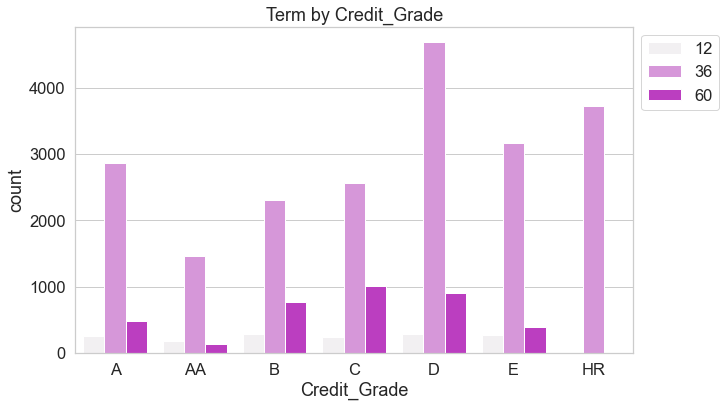

In [33]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.countplot(data =Loans, x = 'Credit_Grade', hue = 'Term', order=['A','AA','B','C','D','E','HR'],color = '#CF28D6')
plt.title("Term by Credit_Grade")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('Term_Credit_Grade.png', dpi=300, bbox_inches='tight');
plt.show();

### Correlation plot

In [45]:
numeric_vars = ['Term','Listing_Category','Disbursed_Amount','Investors']
categoric_vars = ['Credit_Grade', 'Loan_Status', 'Employment_Status']

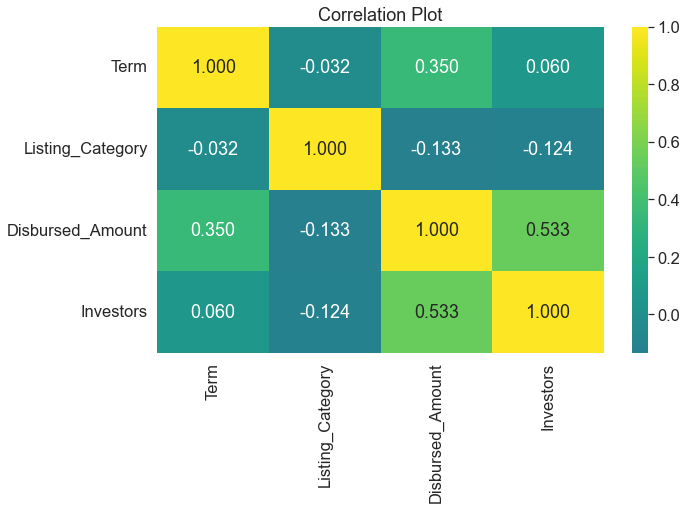

In [46]:
plt.figure(figsize = [10,6])
sb.heatmap(data=Loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.title("Correlation Plot")
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show();

### Comparison between Disbursed_Amount and Loan_Status

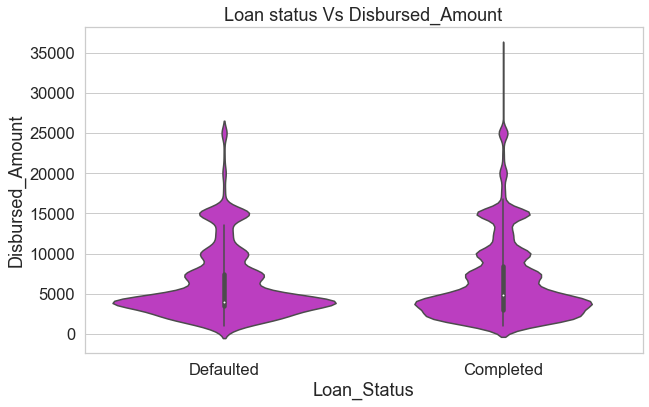

In [34]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.violinplot(data=Loans, x='Loan_Status', y = "Disbursed_Amount", color ='#CF28D6')
plt.title("Loan status Vs Disbursed_Amount")
plt.savefig('loan_status_Disbursed_Amount.png', dpi=300, bbox_inches='tight')
plt.show();

### Comparison between Disbursed_Amount and Term

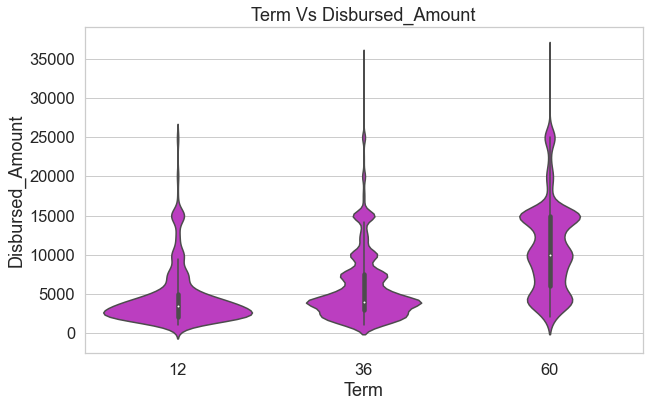

In [35]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.violinplot(data=Loans, x='Term', y = "Disbursed_Amount", color ='#CF28D6')
plt.title("Term Vs Disbursed_Amount")
plt.savefig('Term_Disbursed_Amount.png', dpi=300, bbox_inches='tight')
plt.show();

### Comparison between Investors and Loan_Status

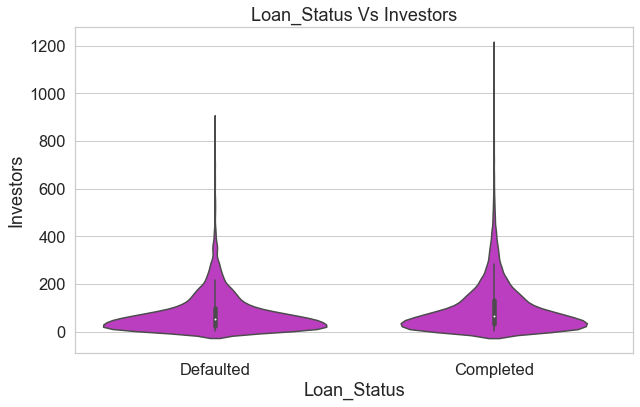

In [36]:
plt.figure(figsize = [10,6])
sb.set(style="whitegrid", font_scale = 1.5)
sb.violinplot(data=Loans, x='Loan_Status', y = "Investors", color ='#CF28D6')
plt.title("Loan_Status Vs Investors")
plt.savefig('Loan_Status_Investors.png', dpi=300, bbox_inches='tight')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

#### Completed Loans vs Credit Grade
The credit_Grade D of the completed Loans is more than 4000 in count

#### Defaulted Loans compared with Credit Grade
The credit_Grade D of the Defaulted Loans is more than 1600 in count.

#### Loan_Status vs Disbursed_Amount 
Defaulted Loans had majority of accounts falling below usd 5000 compared to completed Loans.

#### Term vs Disbursed_Amount
Median amounts for 12 and 36 months falls below usd 5000 while for 60 months is at usd 10000

### Correlation plot
Correlation Plot represents how variables relates to one another and determines whether there are positive or negative correlations

#### Loan_Status vs Investors 
Defaulted Loans had an impact to a median of less than 100 investors

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### Loan_Status vs Employement
under completed Loans most of the customers were employed with more than 12000 in count

#### Term vs Employment_Status
Most of the employed customer preferred the 36 month loan tenure

#### Term_Credit_Grade
Customers with credit_Grade D preferred the 36 month loan tenure with more than 4000 in count


## Multivariate Exploration

### Investigating between Disbursed_Amount, Loan_Status and Employment_Status

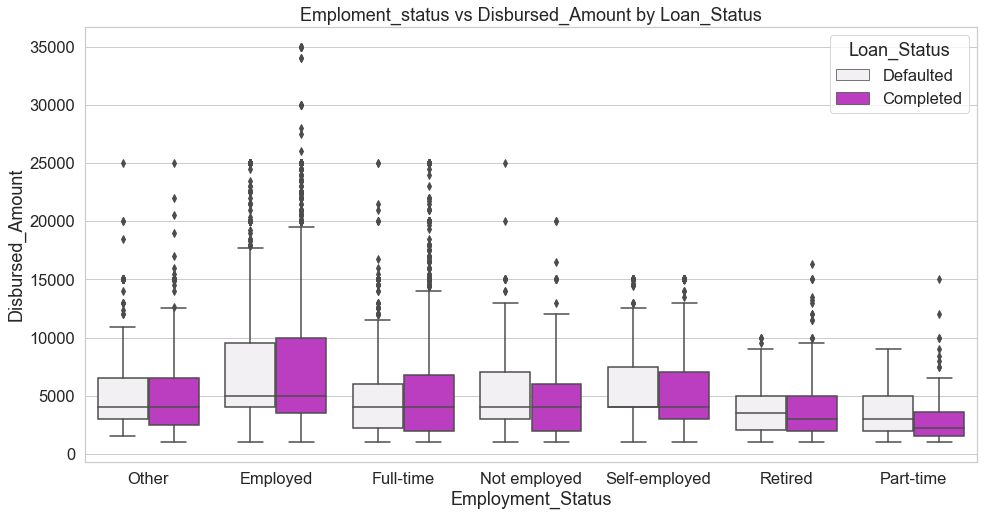

In [37]:
plt.figure(figsize = (16,8))
sb.set(style="whitegrid", font_scale = 1.5)
sb.boxplot(data = Loans, x = 'Employment_Status', y = 'Disbursed_Amount', hue = 'Loan_Status', color = '#CF28D6')
plt.title("Emploment_status vs Disbursed_Amount by Loan_Status")
plt.savefig('Emploment_status vs Disbursed_Amount by Loan_Status', dpi=300, bbox_inches='tight');
plt.show()

### Investigating between Disbursed_Amount, Loan_Status and Credit_Grade

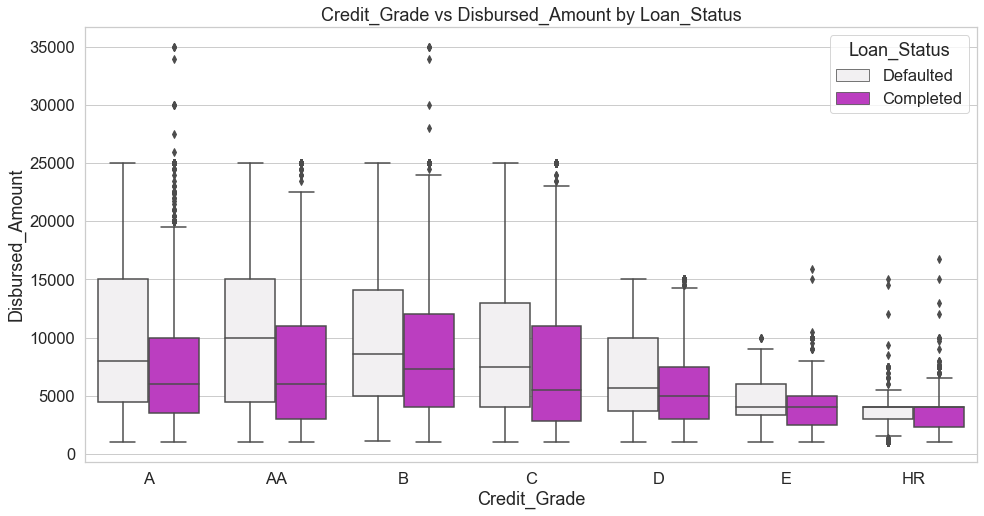

In [38]:
plt.figure(figsize = (16,8))
sb.set(style="whitegrid", font_scale = 1.5)
sb.boxplot(data=Loans, x ='Credit_Grade', y = 'Disbursed_Amount', hue = 'Loan_Status',order=['A','AA','B','C','D','E','HR'], color = '#CF28D6')
plt.title('Credit_Grade vs Disbursed_Amount by Loan_Status')
plt.savefig('Credit_Grade vs Disbursed_Amount by Loan_Status', dpi=300, bbox_inches='tight');
plt.show()

### Investigating between Disbursed_Amount, Loan_Status and Term of the Loan


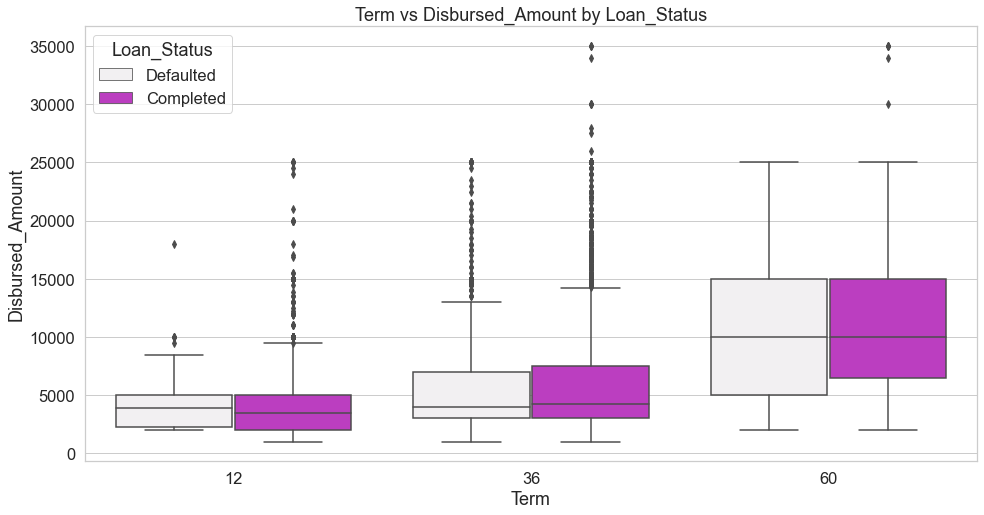

In [39]:
plt.figure(figsize = (16,8))
sb.set(style="whitegrid", font_scale = 1.5)
sb.boxplot(data=Loans, x ='Term', y = 'Disbursed_Amount', hue = 'Loan_Status', color = '#CF28D6')
plt.title('Term vs Disbursed_Amount by Loan_Status')
plt.savefig('Term vs Disbursed_Amount by Loan_Status', dpi=300, bbox_inches='tight');
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Emploment_status vs Disbursed_Amount by Loan_Status
For employed customers the mean disbursed amount is at usd 5000 with an outlier of about 35000

### Were there any interesting or surprising interactions between features?

#### Credit_Grade vs Disbursed_Amount by Loan_Status
For credit Grade A and AA the upper quartiles were at 15000

#### Term vs Disbursed_Amount by Loan_Status
for both completed and defaulted loans the median falls below usd 5000

## Conclusions
The ProsperLoan Dataset Explanatory Analysis above, consists of 113937 rows and 81 columns which i narrowed down to 84853 rows and 12 columns for better results. This provided key insights and observations of the data.It was observed that For employed customers the mean disbursed amount is at usd 5000 with an outlier of about 35000 and also Most of the employed customer preferred the 36 month loan tenure.
